In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Antes se hizo un análisis en el archivo /home/jlhb1984/py-projects/Archived/ransa TS000160370.ipynb

In [2]:
raw_fuel_data=pd.read_csv('/home/jlhb1984/py-projects/data/cases/ssw775.csv',sep=';',encoding='latin1')
raw_fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Created  1063 non-null   object
 1   Message  1063 non-null   object
 2   Status   1063 non-null   object
dtypes: object(3)
memory usage: 25.0+ KB


In [3]:
e0x=raw_fuel_data[raw_fuel_data['Status'].str.contains('3E0')]
row_number=e0x.shape[0]
#e0x.to_csv('/home/jlhb1984/py-projects/data/veepo/wcr728_.csv')

In [4]:
fs01_dec_value=[]
fs02_dec_value=[]

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E01')
    if len(e0x_aux)>0:
        fs01=(e0x_aux[aux:aux+18])
        if len(fs01)>17:
            msb=fs01[10:12]
            lsb=fs01[8:10]
            measure=msb+lsb
            fs01_dec_value.append(int(measure,16))

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E02')
    if len(e0x_aux)>0:
        fs02=e0x_aux[aux:aux+18]
        if len(fs02)>17:
            msb=fs02[10:12]
            lsb=fs02[8:10]
            measure=msb+lsb
            fs02_dec_value.append(int(measure,16))
            
        #print(fs01_cad)   

fs01_count=len(fs01_dec_value)
fs02_count=len(fs02_dec_value)
print('Sensor values 1: ',fs01_count,'\n','Sensor values 2: ',fs02_count)

Sensor values 1:  389 
 Sensor values 2:  3


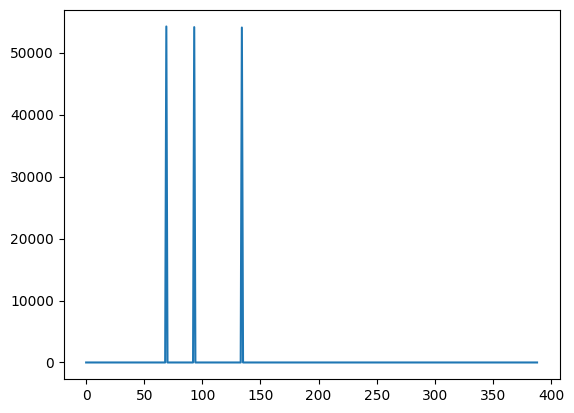

In [57]:
fs01_x_values=[]
fs02_x_values=[]

for i in range(0,fs01_count):
    fs01_x_values.append(i)
    
for i in range(0,fs02_count):
    fs02_x_values.append(i)

plt.plot(fs01_x_values,fs01_dec_value)

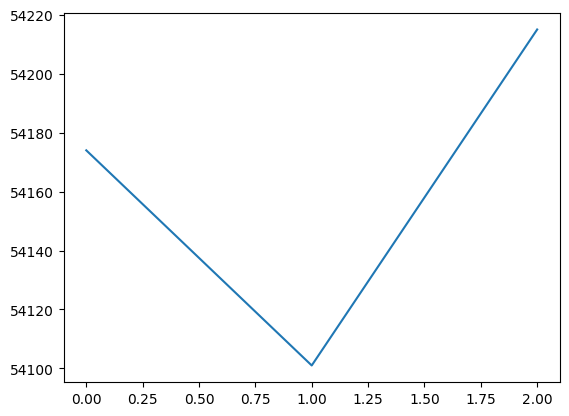

In [58]:
plt.plot(fs02_x_values,fs02_dec_value)
#plt.plot(fs02_x_values,fs02_dec_value)

La pendiente y el intercepto en TSO se calcula con el volumen en litros.

In [59]:
liters_fs=[]
galons_fs=[]
num_galons=int(input('Type tanke volume in galons: '))

for i in range(0,num_galons):
    galons_fs.append(float(i))
    #print(aux_volume)    

for i in range(0,len(galons_fs)):
    aux_volume=galons_fs[i]*3.78541
    liters_fs.append(aux_volume)

print(liters_fs)


[0.0, 3.78541, 7.57082, 11.35623, 15.14164, 18.92705, 22.71246, 26.497870000000002, 30.28328, 34.068690000000004, 37.8541, 41.63951, 45.42492, 49.21033, 52.995740000000005, 56.781150000000004, 60.56656, 64.35197000000001, 68.13738000000001, 71.92279, 75.7082, 79.49361, 83.27902, 87.06443, 90.84984, 94.63525, 98.42066, 102.20607000000001, 105.99148000000001, 109.77689000000001, 113.56230000000001, 117.34771, 121.13312, 124.91853, 128.70394000000002, 132.48935, 136.27476000000001, 140.06017, 143.84558, 147.63099, 151.4164, 155.20181, 158.98722, 162.77263000000002, 166.55804, 170.34345000000002, 174.12886, 177.91427000000002, 181.69968, 185.48509, 189.2705, 193.05591, 196.84132, 200.62673, 204.41214000000002, 208.19755, 211.98296000000002, 215.76837, 219.55378000000002, 223.33919, 227.12460000000002, 230.91001, 234.69542, 238.48083, 242.26624, 246.05165000000002, 249.83706, 253.62247000000002, 257.40788000000003, 261.19329, 264.9787, 268.76411, 272.54952000000003, 276.33493, 280.12034, 28

In [60]:
from sklearn.preprocessing import StandardScaler #Estandariza los datos.
from sklearn.linear_model import LinearRegression #Importo el modelo.
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

df_data=pd.DataFrame()

print(len(liters_fs),len(fs01_dec_value))

df_data['NCode']=fs01_dec_value
df_data['Volume']=liters_fs

#df_data.to_csv('/home/jlhb1984/py-projects/data/cases/Export.csv')

x=df_data['NCode'].values.reshape(-1, 1)#Si no se pone, sale error porque x_std y y_std requieren este reshape.
y=df_data['Volume'].values.reshape(-1, 1)
sc_x=StandardScaler()
sc_y=StandardScaler()
x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y)
slr=LinearRegression()
slr.fit(x_std,y_std)

389 389


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [62]:
X_cols=df_data['NCode'].values.reshape(-1,1)
y_col=df_data['Volume'].values.reshape(-1,1)

X=X_cols
y=y_col

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x=StandardScaler().fit(X)
sc_y=StandardScaler().fit(y)

X_train=sc_x.transform(X_train)
X_test=sc_x.transform(X_test)
y_train=sc_y.transform(y_train)
y_test=sc_y.transform(y_test)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [63]:
model = LinearRegression()
model.fit(X, y)

# 3. Access the Slope and Intercept
slope = model.coef_
intercept = model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): [[-0.00672161]]
Intercept: [737.17524859]


Text(0.5, 0, 'N code')

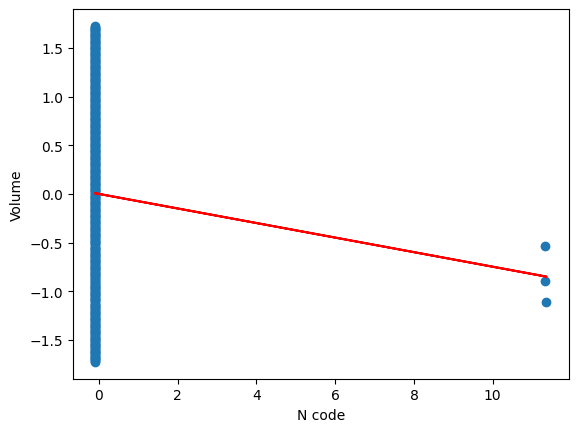

In [64]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std),color='red')
plt.ylabel('Volume')
plt.xlabel('N code')

In [65]:
ncode=input("N Code: ")
num_galons_lr=sc_x.transform(np.array([ncode]).reshape(-1,1))
sc_y.inverse_transform(slr.predict(num_galons_lr))


array([[733.44475771]])

In [66]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

#print("r2 ", r2.round(4))
#print("mse: ", mse.round(4))
print("r2 ", r2)
print("mse: ", mse)

r2  0.005263474478429231
mse:  0.9268052354264544
